## CHEM3212 Big Data Big Science Assessment

### Student Number: 200913172

The following Jupyter Notebook contains the analysis and interpretations of data extracted from the GEOS-Chem global chemistry transport model simulation. 


**Data Statement**

<table>
<tr>
<td><b>Data Source:</b></td><td style='text-align:left'>The data set was compiled from a one year simulation of global chemistry transport model GEOS-Chem. The dataset is driven by meteorlogical inputs from the Goddard Earth Observing System (GEOS) of the NASA Global Modelling and Assimilation Office with a continuous archive from 1979 to present. The mdoel is managed by support teams based at Harvard and Dalhousie Universities with support from US NASA Eart Science Division, Canadian National and Engineering Research Council and  Nanjing University of Information Sciences and Technology. 
    <br> <br> GEOS-Chem Web Site. <i> Acmg.seas.harvard.edu </i> [online]. 2019 [Accessed 15 April 2019]. Available from: http://acmg.seas.harvard.edu/geos/index.html.</td>
</tr>
<tr>
<td><b>Sensitivity of the data:</b></td><td style='text-align:left'>This data set does not contain sensitve data.</td>
</tr>
<tr> 
    <td><b>Restrictions on use:</b></td><td style='text-align:left'>This data is publically available.</td>
</tr>
</table>

--------------------------------------------

In [1]:
# Import required packages

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Data import

# The data was imported as a dictionary of arrays.

file ='C:/Users/Sophia.Liu/Downloads/assessment.npz' #file path

arrays = np.load(file)
data = {}
array_list = ['lon_array', 'lat_array', 'time_array', 'oh_array', 'no_array', 'ho2_array', 'no2_array', 'o3_array',
              'so2_array', 'temp_4d_array', 'surface_temp_3d_array', 'mix_water_array', 'total_num_density_array']

for i in range(0, len(array_list)): # define key value pairs in array dictionary
    if i < 2:
        data[array_list[i]] = arrays['arr_' +'%s' %i]
    elif i >= 2:
        data[array_list[i]] = arrays['arr_' +'%s' %str(i+1)] # arrays['arr_2'] not defined in data imported. 
        
# adjust scaling for arrays into ppb

data['no_array'] = data['no_array'] * 1e9
data['ho2_array'] = data['ho2_array'] * 1e9
data['no2_array'] = data['no2_array'] * 1e9
data['o3_array'] = data['o3_array'] * 1e9
data['so2_array'] = data['so2_array'] * 1e9

--------------------------------------------

### Task 1
##### Determine the dimensions of each parameter in the model output. 
<br>
<div style="text-align: justify">
A function <i> get_dim() </i> was defined to extract the dimensions of arrays stored as dictionary values. The function took two arguments: a list of the keys to identify the arrays and the source dictionary. The shape method was then applied to the arrays and a dataframe (for presentation) was returned with the resulting dimensions. The use of a dataframe reduced the number of calls to print() compared to individually passing the arrays to the shape method and printing the result. </div>

In [3]:
def get_dim(keys, dictionary):
    ''' A function that returns the shape of numpy arrays from a dictionary of arrays. 
    
    keys: [list] a list of keys corresponding to the arrays in dictionary
    dictionary: [dict] the dictionary containing the keys and values as numpy arrays. 
    
    returns pandas dataframe with columns array (dictionary keys passed to function) 
    and dimensions (the shape of the arrays).
    
    '''
    sizes = []
    
    for key in keys:
        sizes.append(dictionary['%s' %key].shape)
        
    df = pd.DataFrame({'Array': keys, 'Dimensions' : sizes})
    
    return df

In [4]:
# apply get_dim to data
dimensions = get_dim(array_list, data) 
print(dimensions)

                      Array        Dimensions
0                 lon_array             (72,)
1                 lat_array             (46,)
2                time_array             (12,)
3                  oh_array  (12, 72, 46, 38)
4                  no_array  (12, 72, 46, 38)
5                 ho2_array  (12, 72, 46, 38)
6                 no2_array  (12, 72, 46, 38)
7                  o3_array  (12, 72, 46, 47)
8                 so2_array  (12, 72, 46, 47)
9             temp_4d_array  (12, 72, 46, 47)
10    surface_temp_3d_array      (12, 72, 46)
11          mix_water_array  (12, 72, 46, 47)
12  total_num_density_array  (12, 72, 46, 47)


#### Interpretation of Results
<br>
<div style="text-align: justify">
The model output gives the concentrations of radicals and temperatures as a 4d array. Each array entry corresponds to a grid-box defined by a unique combination of time, longitude, latitude and model layer. The time is defined along the first axis, the second axis defines the longitude, the third access the latitude and the final axis is the model layer. The surface temperature array, is only 3D, since it is measured along the lowest model layer (index 0), hence the fourth model layer axis isn't required.</div>

--------------------------------------------

### Task 2
##### Calculate the annual mean temperature for the lowest three model altitude levels combined and the mean temperature for each month for the same model region. Plot the variation in this monthly mean temperature throughout the year. 



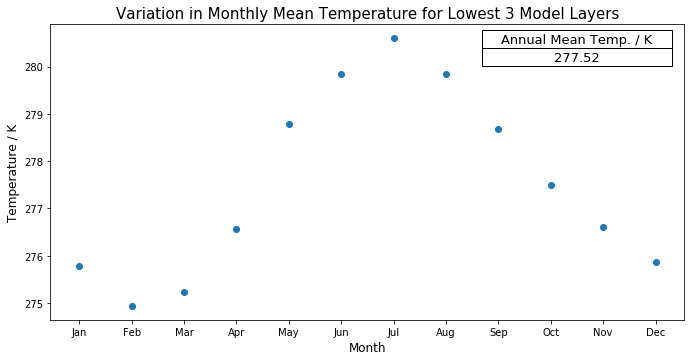

In [5]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

lowest_3_layers = data['temp_4d_array'][:, :, :, 0:3] # lowest three layers 0 to 2. 

annual_mean = np.mean(lowest_3_layers) # taking the mean across all 4 axes (global) in K
mean_per_month = np.mean(lowest_3_layers, axis = (1,2,3)) # taking the mean across long, lat and model layer in K

fig = plt.figure(figsize = (25, 25))
fig1 = fig.add_subplot(421)

# Scatter plot
fig1.scatter(months, mean_per_month)
fig1.set_title('Variation in Monthly Mean Temperature for Lowest 3 Model Layers', size = 15)
fig1.set_xlabel('Month', size = 12)
fig1.set_ylabel('Temperature / K', size = 12)

# Data table
col_labels=['Annual Mean Temp. / K']
table_vals=[[np.round_(annual_mean, decimals = 2)]] # rounded to 2 dp
the_table = fig1.table(cellText=table_vals,colWidths = [0.2],
                  colLabels=col_labels, cellLoc='center',
                  loc='upper right') # insert global annual mean temp in top right
the_table.set_fontsize(15)
the_table.scale(1.5, 1.5)

plt.show()


#### Interpretation

<br>
<div style="text-align: justify">
For the Earth as a whole, the coldest month was February and the warmest month was July. This correlated to the winter and summer months in the Northern hemisphere. This implied that the mean temperature around the globe was influenced more by the effects in the northern hemisphere compared to the southern. </div>

--------------------------------------------

### Task 3
##### Plot suitable graphs or suitable figures that show the distribution in values in the model output for ${O_3}$, ${NO}$, ${NO_2}$, ${SO_2}$, ${OH}$ and ${HO_2}$. Include the annual global mean, standard deviation and median for each parameter in the title to the plots. Comment on your choice of representations and the distributions you determine.

<br>
<div style="text-align: justify">
    The function <i> get_stats </i> was defined to calculate the mean, standard deviation and median of any array passed to it. This was defined to increase the efficiency and portability of the code.
<br>
    <br>
    The use of of a for loop in the implementation of the code reduced repetition, increasing code efficiency. Variations in the lengths of the arrays and units were accounted for with a try and except clause and an if clause. Running the for loop however, may result in a deprecation warning associated with reassigning the plot axis on each iteration to the same name. 
<br>
    <br>
    A combination of box plots and surface plots were used to visualise the distribution of the parameters. The box plot was used to visualise the global distribution. For presentation reasons, to reduce the effects of significant outliers in data, the whiskers of the box plot encompassed the central 90 % of values. However, global min and max were included on the plots for clarity. The surface plot was designed to show the variation in model layer and time, the two axis averaged over before cartopy contour plots in Task 4. It was hoped this would provide the greatest insight. 
</div>

In [6]:
def get_stats(array):
    '''
    Returns the mean, standrd deviation and median of a flattened array. For arrays of parameter concentrations this 
    corresponds to the global mean, standard deviation and median. 
    
    array [np.array] = array of values
    
    returns mean, standard deviation and median [tuple]
    '''
    
    global_mean = np.mean(array, dtype = np.float64)
    global_std = np.std(array, dtype = np.float64)
    global_median = np.median(array)
    
    return (global_mean, global_std, global_median)

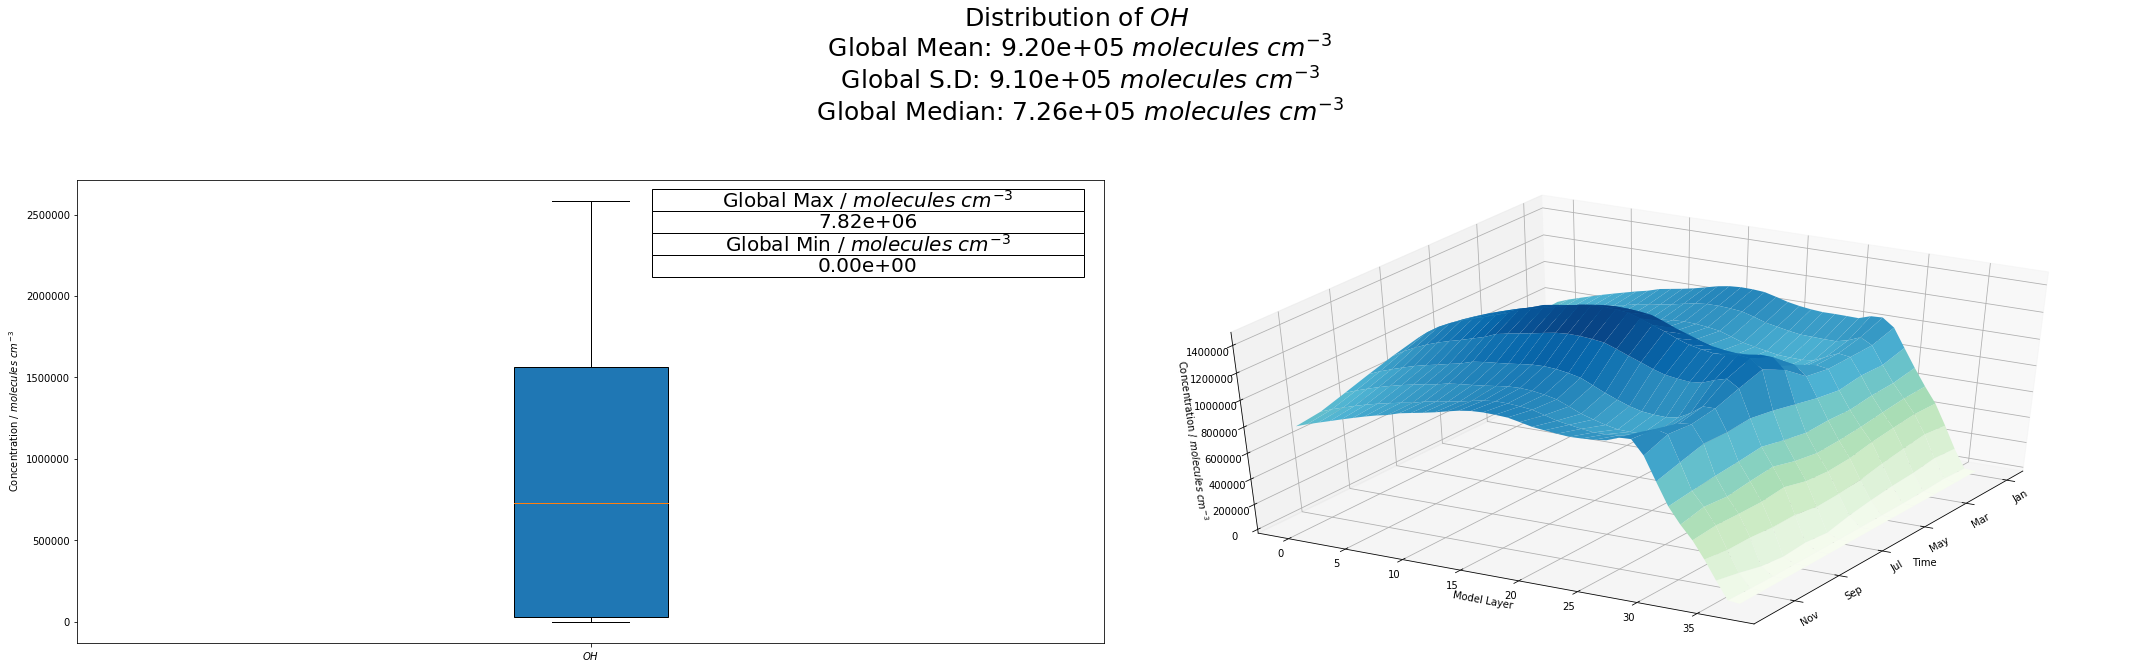

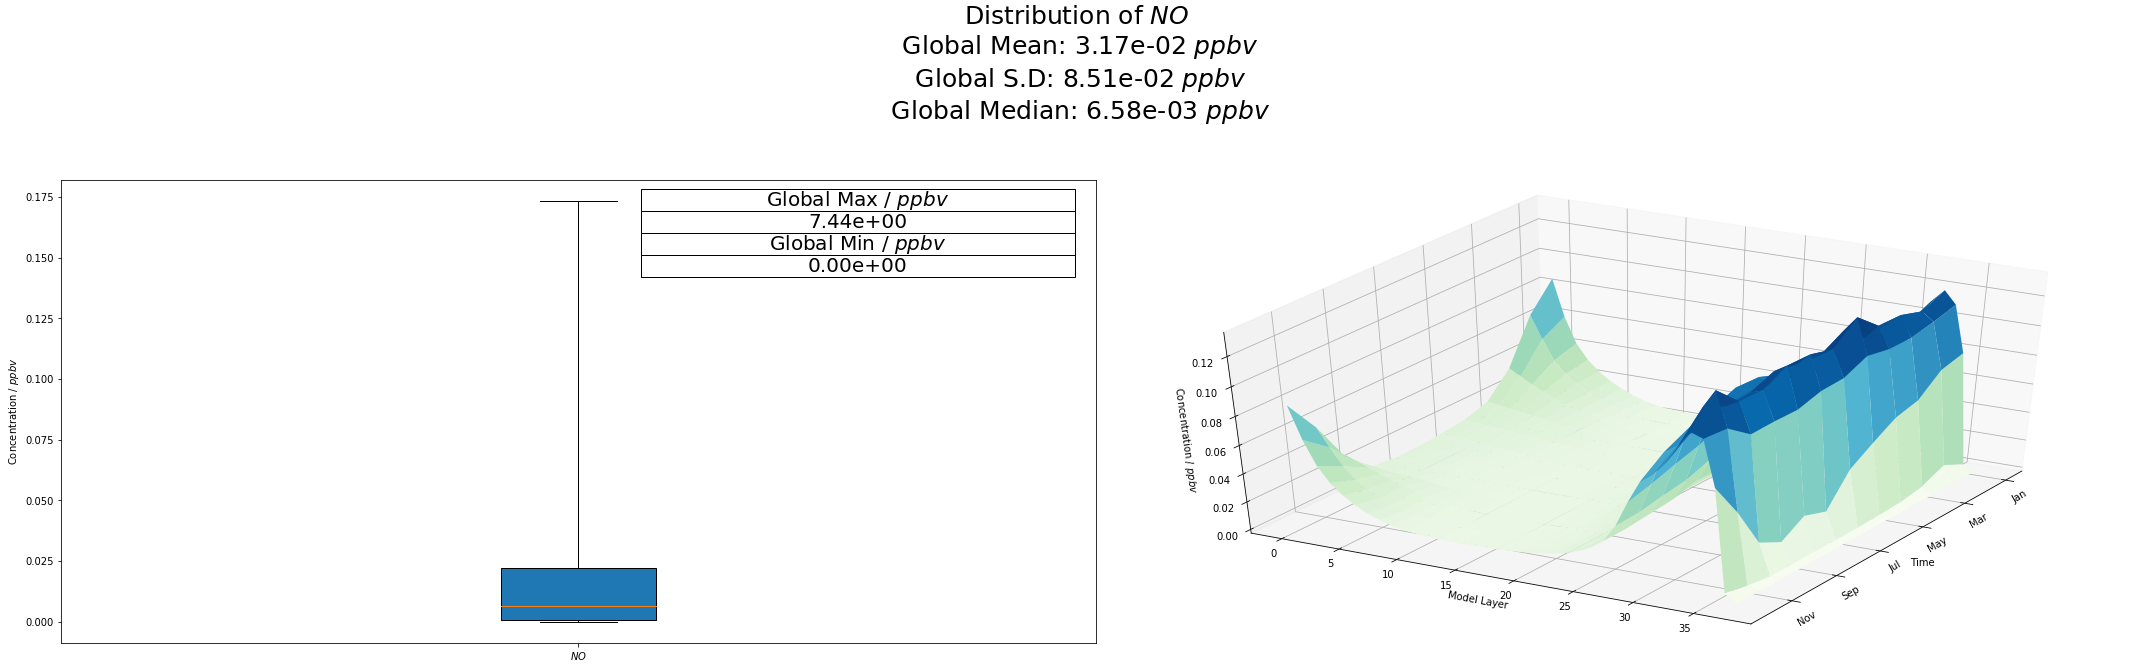

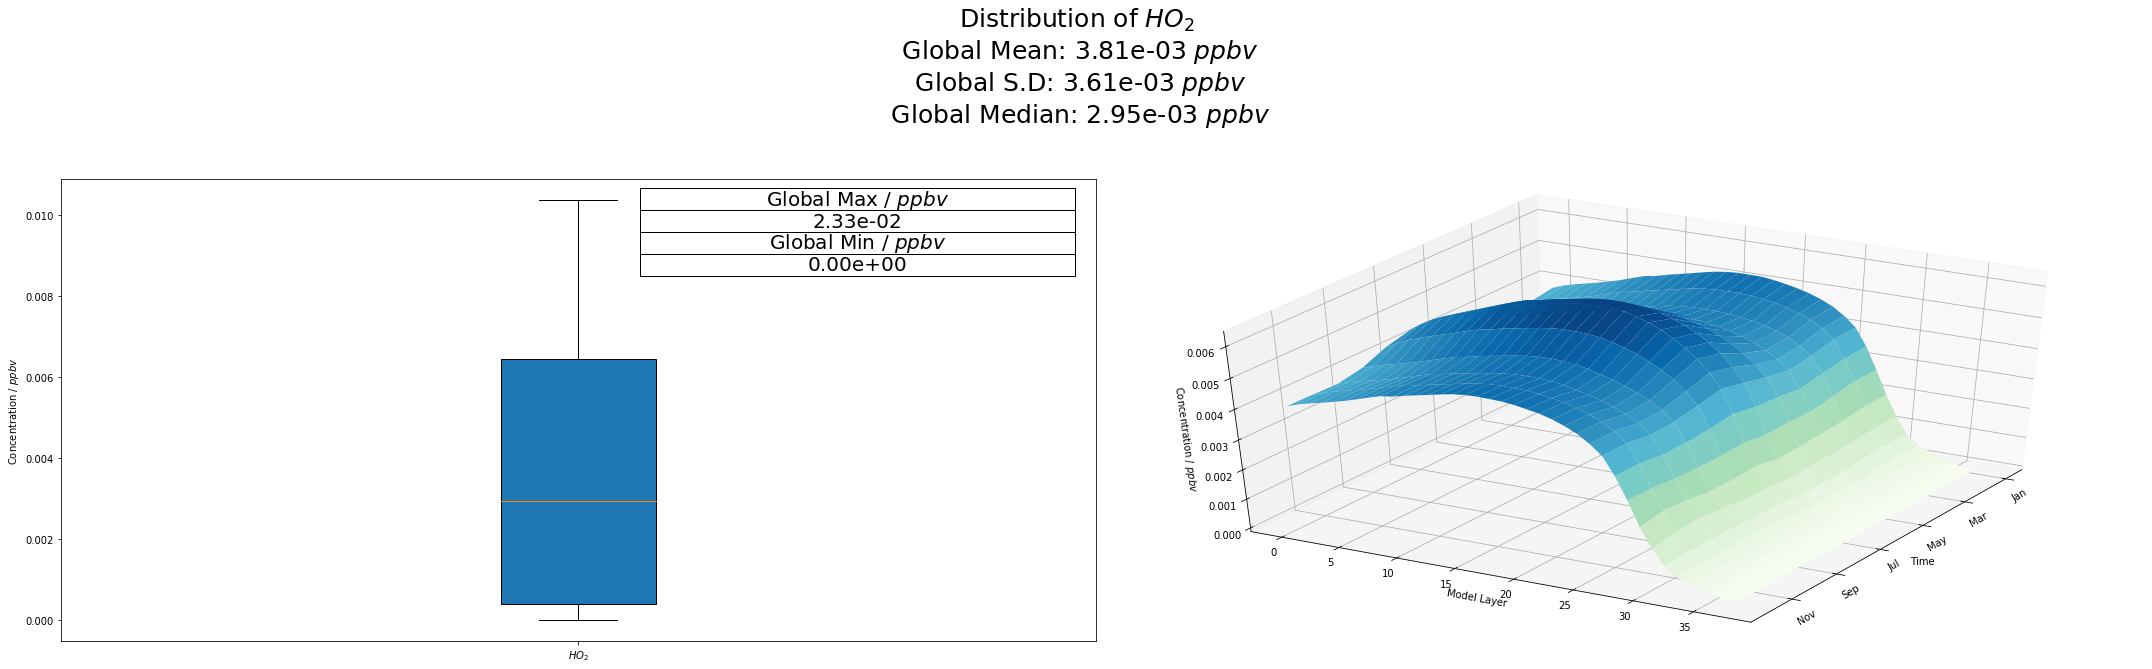

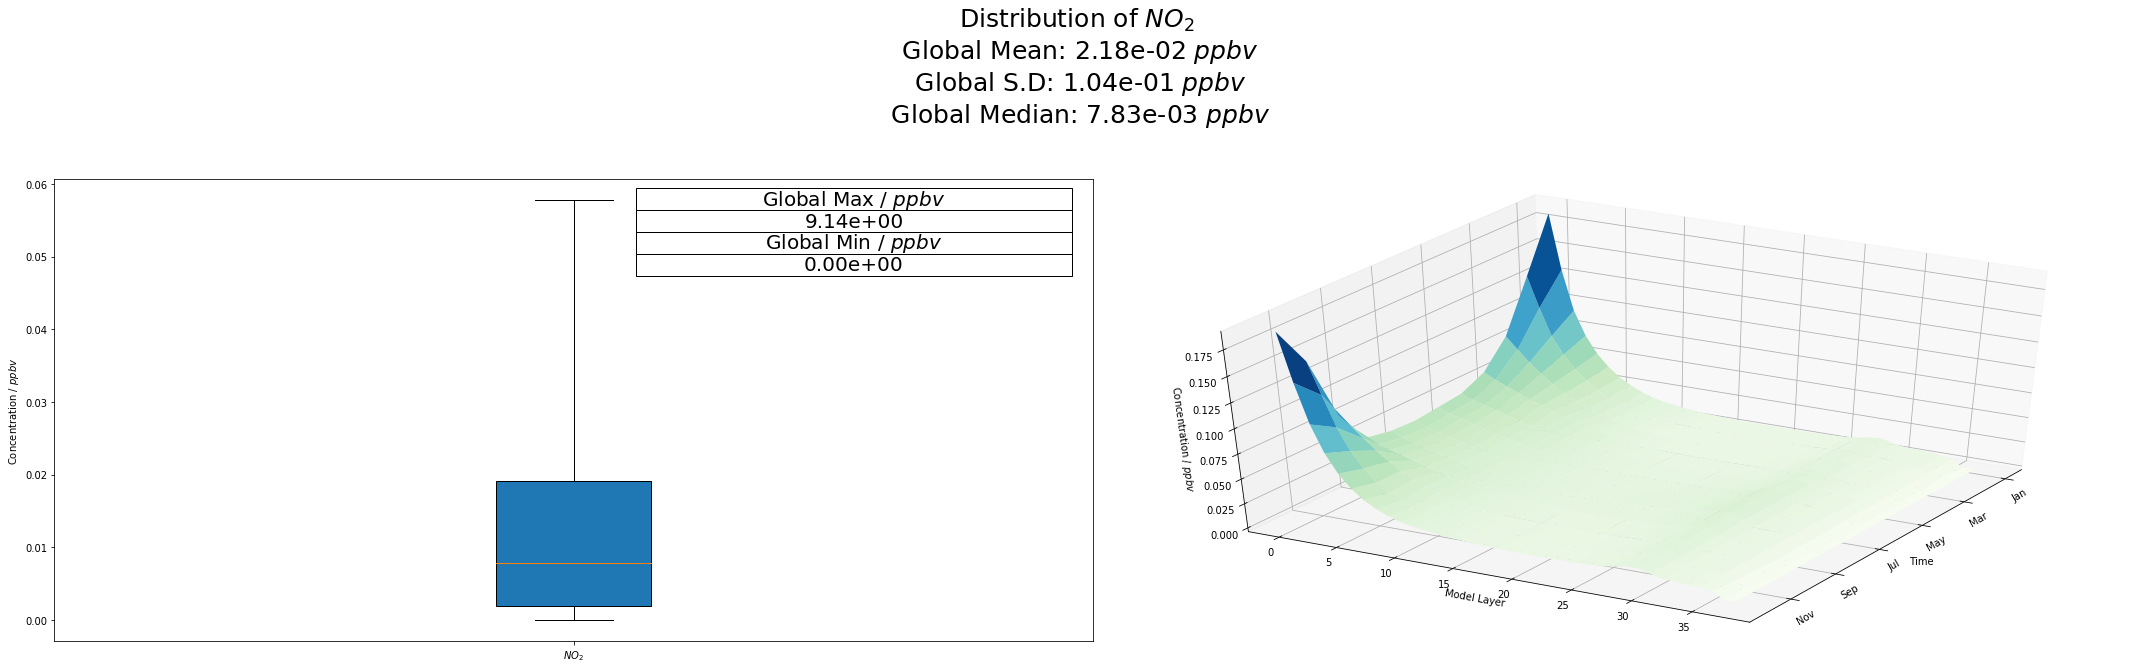

C:\Users\Sophia.Liu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


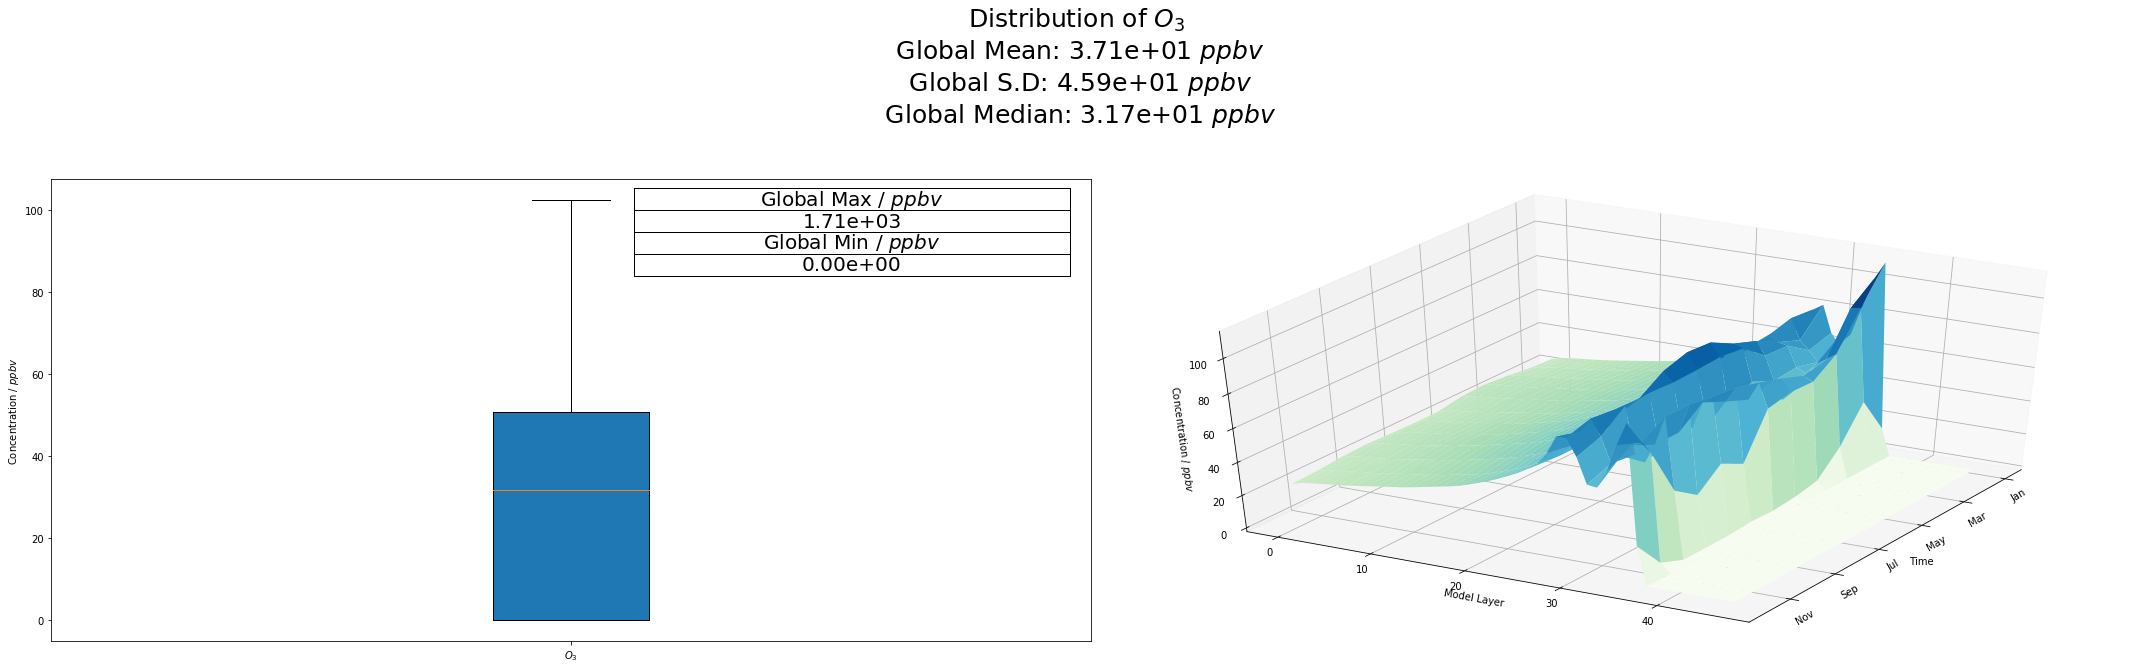

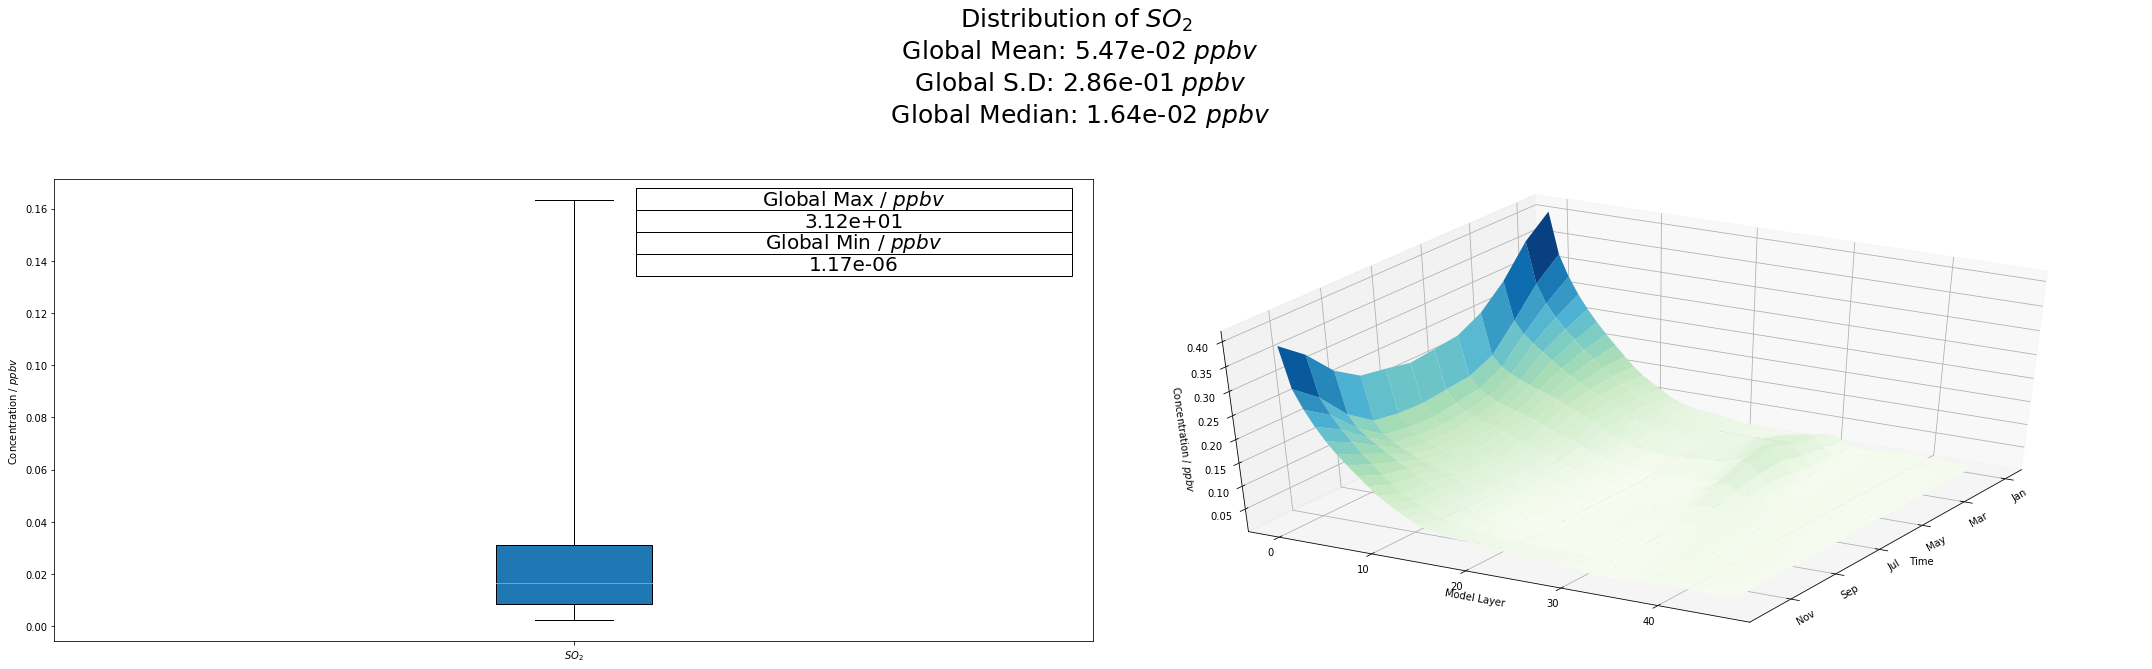

In [24]:
# Set up lists of parameters and statistics for distribution plots

parameter_list = array_list[3:9] # select only arrays that contain the model output for the parameters
parameters = ['${OH}$', '${NO}$', '${HO_2}$', '${NO_2}$', '${O_3}$', '${SO_2}$']
statistics = [get_stats(data['%s' %array]) for array in parameter_list] # get_stats for all the parameters
not_ppbv = ['${OH}$'] # parameters are not measured in ppbv

x = np.linspace(0, 11, 12) # time axis
y = np.linspace(0, 37, 38) # altitude levels (troposphere only)

# Produce plots

for i in range(len(parameters)):
    fig = plt.figure(figsize = (30, 30))
    if parameters[i] in not_ppbv: # assigning correct units to data
        units = ' ${molecules}$ ${cm^{-3}}$'
    else: 
        units =  ' ${ppbv}$'     
    try:
      
        # Box plot
        ax = fig.add_subplot(421)
        plt.boxplot(data[parameter_list[i]].flatten(), sym = '', patch_artist = True, labels = ['%s' %parameters[i]],
                    whis = [5,95]) # plot global data with 95% confidence limits
        ax.set_ylabel('Concentration /' + units)
        
        # insert table with global min / max
        table_vals = [['Global Max /' + units], ['{:.2e}'.format(np.max(data[parameter_list[i]]))],
                       ['Global Min /' + units], ['{:.2e}'.format(np.min(data[parameter_list[i]]))]] # global min and max
        the_table = ax.table(cellText = table_vals,
                             colWidths = [0.3], 
                             cellLoc ='center',
                             loc = 'upper right')
        the_table.set_fontsize(20)
        the_table.scale(1.4, 1.4)
             
        # Surface plot
        ax1 = fig.add_subplot(422, projection='3d')
        mean_over_earth = np.mean(data[parameter_list[i]], axis = (1,2)) # mean over longitudes and latitudes
        X, Y = np.meshgrid(x, y)  # plot_surface expects all data to be 2D
        ax1.plot_surface(X.T, Y.T, mean_over_earth, cmap = 'GnBu')
       	ax1.set_xlabel('Time')
        ax1.set_ylabel('Model Layer')
        ax1.set_xticklabels(months[::2], rotation = 30) # major x ticks default to every other month
        ax1.set_zlabel('Concentration /' + units)
        ax1.view_init(40, 30)
        plt.tight_layout() 
        
    except:
        y = np.linspace(0, 46, 47) # correct altitude levels to full 47 levels
        
        # Box plot
        ax = fig.add_subplot(421)
        plt.boxplot(data[parameter_list[i]].flatten(), sym = '', patch_artist = True, labels = ['%s' %parameters[i]], 
                    whis = [5,95]) # plot global data with 95% confidence limits
        ax.set_ylabel('Concentration /' + units)
        
        # insert table with global min / max
        table_vals = [['Global Max /' + units], ['{:.2e}'.format(np.max(data[parameter_list[i]]))],
                       ['Global Min /' + units], ['{:.2e}'.format(np.min(data[parameter_list[i]]))]] # global min and max
        the_table = ax.table(cellText = table_vals,
                             colWidths = [0.3], 
                             cellLoc ='center',
                             loc = 'upper right')
        the_table.set_fontsize(20)
        the_table.scale(1.4, 1.4)
        
        # Surface plot
        ax1 = fig.add_subplot(422, projection='3d')
        mean_over_earth = np.mean(data[parameter_list[i]], axis = (1,2)) # mean over longitudes and latitudes
        X, Y = np.meshgrid(x, y) # plot_surface expects all data to be 2D
        ax1.plot_surface(X.T, Y.T, mean_over_earth, cmap = 'GnBu')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Model Layer')
        ax1.set_zlabel('Concentration /' + units)
        ax1.set_xticklabels(months[::2], rotation = 30)  # major x ticks default to every other month
        ax1.view_init(40, 30)
        plt.tight_layout()
    
    rounded_stats = ['{:.2e}'.format(statistics[i][n]) for n in range(3)] # 3sf in scientific notation
    fig.suptitle('Distribution of %s' %parameters[i] + '\n Global Mean: ' + rounded_stats[0] + units + 
                 '\n Global S.D: ' + rounded_stats[1] + units + 
                 '\n Global Median: ' + rounded_stats[2] + units, size = 25)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

#### Interpretation

<br>
<div style="text-align: justify">
The box plots provided a snapshot of the parameter concentrations annually and globally across all grid-boxes. The box plots of global data highlighted the presence of large extremes within the data, supported by the large global standard deviations. The contour plots provided insights into monthly and altitudal variations of these data. 
<br>
    <br>
    <b>Key findings:</b>
<br>
    <br>
    <ul>
<li><b> ${OH}$ - Hydroxide:  </b> 
 The average concentration remained relatively constant over the year, with slight peak at July. The ${OH}$ concentration rapidly decreased after model layer 30. There was a large distribution over concentrations globally. The median concentration and standard deviation was of the same magnitude, further supporting a large variation in data. </li>
 <br>
<li><b> ${NO}$ - Nitrogen Oxide:  </b>  
Nitrogen Oxide was unevenly distributed across gridboxes. Higher concentrations were observed at higher model levels, and at surface level in January and December. The box plot implied that these maxima were extremes in data. </li>
<br>
<li><b> ${HO_2}$ - Hydrogen Dioxide:  </b>  
Visually, the distribution of ${HO_2}$ had a similar profile to hydroxide, however explicit comparisons couldn't be made due to different units. </li>
<br>
<li><b> ${NO_2}$ - Nitrogen Dioxide:  </b>  
Nitrogen Oxide was unevenly distributed across gridboxes. Higher concentrations were observed at higher model levels, and at surface level in January and December. The box plot implied that these maxima were extremes in data. </li>
<br>
<li><b> ${O_3}$ - Ozone:  </b> 
The distribution of ozone increased uniformly with model layer until around level 25. The distribution then fluctuated. Globally, levels of ozone were on the lower end of the global distribution as shown on the boxplot. </li>
<br>
<li><b> ${SO_2}$ - Sulfur Dioxide:  </b> 
Sulfur dioxide remained globally low, however the global minima was greater than 0. Highest levels were towards the surface with peaks in November to February, the box plot distribution and high magnitude of standard deviation implied that these values were outliers. </li>
    </ul></div>
    
    
--------------------------------------------

### Task 4
##### Plot contour maps showing the annual mean surface concentrations (or mixing ratios) for ${O_3}$, ${NO}$, ${NO_2}$, ${SO_2}$, ${OH}$ and ${HO_2}$.

<br>
<div style="text-align: justify">
The function <i> plot_on_earth </i> was defined to plot a contour map of concentrations of parameters averaged over model layer and time to show distribution against longitude and latitude. </div>

In [8]:
def plot_on_earth(array, title, cbarlab, x = 'lon_array', y = 'lat_array', dictionary = data):
    '''
    Returns a contour plot of grid-box values over latitudes and longitudes. 
    
    array [2d array] = gridbox values default to axis = 0: latitudes, axis = 1:longitudes
    title [string] = desired plot title
    cbarlab [string] = units of data in array, to label the color bar. 
    
    '''
    array = np.transpose(array) # interchange axis to fit Earth
    fig = plt.figure(figsize = [10,6])
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.coastlines() 
    ax.set_xticks([-180, -90, 0, 90, 180], crs = ccrs.PlateCarree())
    ax.set_yticks([-60, -30, 0, 30, 60], crs = ccrs.PlateCarree())
    plt.contourf(dictionary['%s' %x], dictionary['%s' %y],array , 25, cmap = plt.cm.get_cmap('Spectral_r'))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    cbar = plt.colorbar(orientation = 'horizontal', shrink = 0.8)
    cbar.set_label('%s' %cbarlab)
    plt.title('%s' %title)
    
    return plt.show()


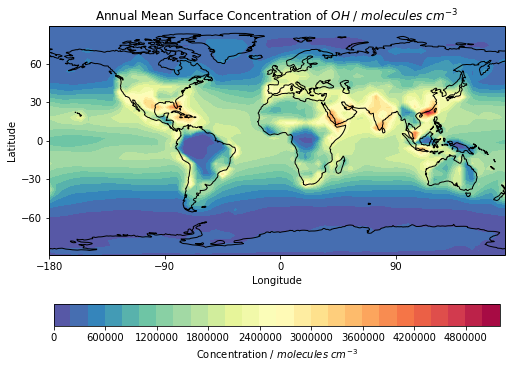

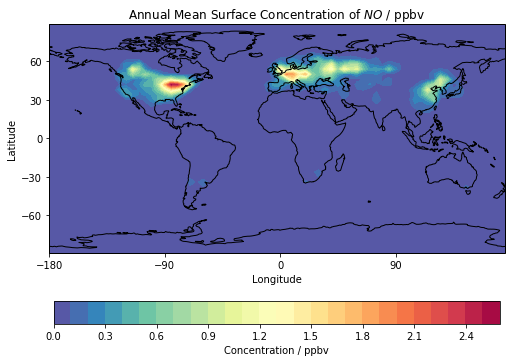

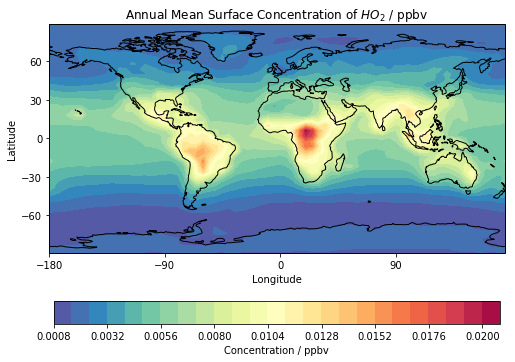

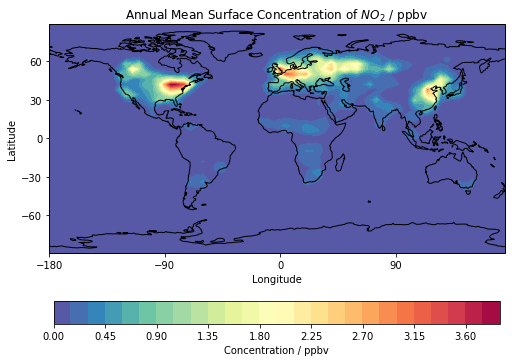

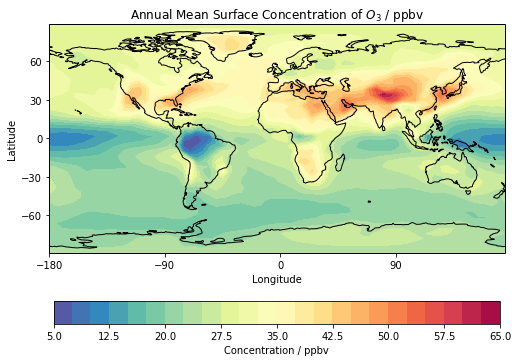

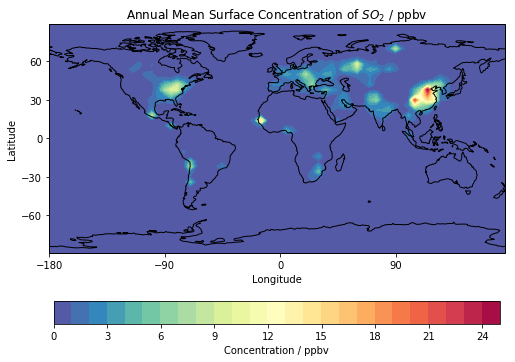

In [9]:
# plot surface contour maps for all parameters
# reuse parameter lists and not_ppbv list from previous task to assign correct units
for p in parameters:
    if p in not_ppbv : # arrays in molecules cm-3
        i = parameters.index(p)
        title = 'Annual Mean Surface Concentration of ' + p + ' / ${molecules}$ ${cm^{-3}}$' 
        mean_over_surface = np.mean(data[parameter_list[i]][:,:,:,0], axis = 0) # mean over months for first model layer. 
        plot_on_earth(mean_over_surface, title, cbarlab = 'Concentration / ${molecules}$ ${cm^{-3}}$')

    else: # arrays in ppbv
        i = parameters.index(p) 
        title = 'Annual Mean Surface Concentration of ' + p + ' / ppbv' 
        mean_over_surface = np.mean(data[parameter_list[i]][:,:,:,0], axis = 0) # mean over months for first model layer. 
        plot_on_earth(mean_over_surface, title, cbarlab = 'Mixing Ratio / ppbv')

#### Interpretation

<br>
<div style="text-align: justify">
Ozone, ${O_3}$ was well mixed at the earth's surface, and had the highest mixing ratio of all parameters (excluding $OH$). The surface concentration of ${NO}$ and ${NO_2}$ was higher around the east coast of USA and China and across Europe. ${SO_2}$ surface concentration was locally high around China and low elsewhere. ${HO_2}$ concentration peaked over the rainforest regions in Central Africa. ${OH}$ was relatively well mixed around coastal regions and populated areas. These results were unsurprising given that the sources of greenhouse emissions are associated with industrial processes, transportation emissions, agriculture and forestry so were more likely to be localised to technologically developed areas.  The magnitude of the other greenhouse gases were not be compared to that of ${OH}$ due to different units. </div>

--------------------------------------------

### Task 5
##### For   ${OH}$ (the dominant oxidant in the atmosphere), plot a contour map showing the mean concentrations for a subset of months, model layers, latitude range and longitude range as detailed below. Ranges should be inclusive of the values stated. Give the mean  ${OH}$ concentration for the data shown in the plot in the title to the plot. 

<table>
<tr>    
    <th bgcolor = "#F5F5F5" style="text-align:center">Month of Birth</th>
    <th bgcolor = "#F5F5F5" style="text-align:center">Month Range</th>
    </tr>
<tr>
    <td bgcolor = "#FFFFFF" style="text-align:center">March</td>
    <td bgcolor = "#FFFFFF" style="text-align:center">January - March</td>
    </tr>
<tr class= "blank_row"><td bgcolor = "#FFFFFF" colspan = "2"></td></tr>
<tr>    
    <th bgcolor = "#F5F5F5" style="text-align:center">Day of Birth</th>
    <th bgcolor = "#F5F5F5" style="text-align:center">Model Level Range</th> 
    </tr>
<tr>
    <td bgcolor = "#FFFFFF" style="text-align:center">21</td>
    <td bgcolor = "#FFFFFF" style="text-align:center">Up to and including 21</td>
    </tr>
<tr class= "blank_row"><td bgcolor = "#FFFFFF" colspan="2"></td></tr>
<tr>    
    <th bgcolor = "#F5F5F5" style="text-align:center">First Letter of Forename</th>
    <th bgcolor = "#F5F5F5" style="text-align:center">Latitude Range</th> 
    </tr>
<tr>
    <td bgcolor = "#FFFFFF" style="text-align:center">S</td>
    <td bgcolor = "#FFFFFF" style="text-align:center">+30 to +50</td>  
    </tr>
<tr class= "blank_row"><td bgcolor = "#FFFFFF" colspan = "2"></td></tr>
<tr>    
    <th bgcolor = "#F5F5F5" style="text-align:center">First Letter of Surname</th>
    <th bgcolor = "#F5F5F5" style="text-align:center">Longitude Range</th> 
    </tr>
<tr>
    <td bgcolor = "#FFFFFF" style="text-align:center">L</td>
    <td bgcolor = "#FFFFFF" style="text-align:center">-20 to +20</td>  
    </tr>
</table>

Additional function was defined <i> zoomed_on_earth </i> to subset the array, plot the subset and locate the subset on the Earth. 

In [10]:
def zoomed_on_earth(array, title, lat, long, month, level, cbarlab):
    '''
    Variation of plot_on_earth. Returns a contour plot of grid-box values over latitudes and longitudes, 
    subset by a range of months, longitiudes, latitudes and model levels. 
    
    array [4d array] = array of gridbox values
    title [string] = desired plot title
    lat, long, month, level [list,tuple] = range of values to subset
    
    '''
    # import additional packages required
    import shapely.geometry as sgeom
    import cartopy.feature as cfeature
    
    def subset(array, month, lat, long,level):
        '''
        Returns subset of array. Subsetting values of longtiude and latitute must be explicit values within
        the corresponding longitude/latitute array. 
    
        '''
    
        sliced = array[month[0]:month[1] + 1, 
                          int(np.where(data['lon_array'] == long[0])[0]):int(np.where(data['lon_array'] == long[1])[0]),
                          int(np.where(data['lat_array'] == lat[0])[0]):int(np.where(data['lat_array'] == lat[1])[0]), 
                          :level[1] + 1] # identify index locations of subset ranges and slice array at these indicies

        means = np.mean(sliced, axis = (0,3))
    
        return means
    
    sub_array = subset(array, month, lat, long, level) # subset array
    trans_array = np.transpose(sub_array) # interchange axis of subset
    
    # mean of subset
    sub_mean = np.mean(sub_array)
    rounded_sub_mean = '{:.2e}'.format(sub_mean)
    
    # mean over months and levels and interchange axis over full array
    master_array = np.transpose(np.mean(array[month[0]:month[1],:,:, :level[1]+1], axis = (0,3))) 
    
    x1, x2 = long[0], long[1]
    y1, y2 = lat[0], lat[1]
    
    fig = plt.figure(figsize = [12,12])
    
    # main subset plot
    ax = plt.axes([0.0, 0.4, 0.7, 0.7],projection = ccrs.PlateCarree())
    ax.coastlines()
    
    #centre axis around subset range
    ax.set_xticks([x1, x1/2, (x1 + x2)/2, x2/2, x2], crs = ccrs.PlateCarree()) 
    ax.set_yticks([y1, y1/2, (y1 + y2)/2, y2/2, y2], crs = ccrs.PlateCarree())
    
    plt.contourf(data['lon_array'][int(np.where(data['lon_array'] == long[0])[0]):int(np.where(data['lon_array'] == long[1])[0])],
                 data['lat_array'][int(np.where(data['lat_array'] == lat[0])[0]):int(np.where(data['lat_array'] == lat[1])[0])],
                 trans_array , 25, cmap = plt.cm.get_cmap('Spectral_r')) # slicing long and lat arrays to match subset
    cbar = plt.colorbar(orientation = 'horizontal', shrink = 0.9, pad = 0.1)
    cbar.set_label('%s' %cbarlab)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude') 
    
    #subplot axis
    sub_ax = plt.axes([0.725, 0.55, 0.4, 0.4], projection=ccrs.Orthographic(central_longitude=(x1 + x2)/2))
    plt.contourf(data['lon_array'], data['lat_array'],master_array, 25, cmap = plt.cm.get_cmap('Spectral_r')) 
    sub_ax.set_extent([x1 - 20, x2 + 20, y1 - 20, y2 + 20])
    
    # Add the land and coastlines.
    sub_ax.add_feature(cfeature.LAND)
    sub_ax.coastlines()
    sub_ax.stock_img()
    extent_box = sgeom.box(x1, x2, y1, y2)
    sub_ax.add_geometries([extent_box], ccrs.PlateCarree(), facecolor='none',
                          edgecolor='blue', linewidth=2)
    plt.title('Location of Subset', size = 14)
    
    fig.suptitle('%s' %title +  '\n Subset Mean: ' + rounded_sub_mean +' ${molecules}$ ${cm^{-3}}$' , size = 18)
    
    return plt.show()

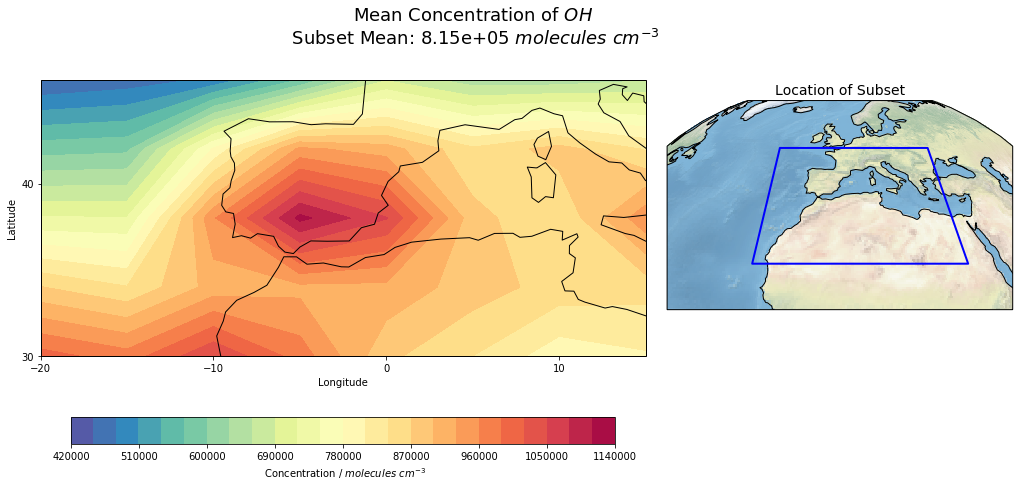

In [11]:
# Define subsets

month = [0, 2] # January to March
level = [0, 21] # Up to the 21
latitudes = [30, 50] # Range for S
longitude = [-20, 20] # Range for L

zoomed_on_earth(data['oh_array'], 'Mean Concentration of ${OH}$ for a Subset Region on Earth', latitudes, longitude, month, 
                level, cbarlab =' Concentration / ${molecules}$ ${cm^{-3}}$')


#### Interpretation

The subset plot produced was mapped around Southern Europe and Northern Africa. It was centred around Spain. 

--------------------------------------------

### Task 6
##### Using the Arrhenius parameters  ${A}$ = ${1.85 x 10^{-12}}$ ${cm^{3}}$  ${molecules^{-1}}$  ${s^{-1}}$ and ${E_{a}}$ = ${14.1}$ ${kJ}$ ${mol^{-1}}$ for the reaction between ${OH}$  and ${CH_4}$, calculate the rate coefficient for ${OH}$  ${+}$ ${CH_4}$ for each grid-box. 

The function <i> rate_coeff </i> was defined to compute the rate coefficient of a reaction using the Arrhenius equation:

$$ {k} = A{\exp}{\frac{-E_{a}}{RT}} $$

This function increased portability of the code, allowing the rate constant to be calculated for any given combination of pre-exponential factor, activation energy and temperature. 

In [12]:
def rate_coeff(A, Ea, T, R = 8.31447):
    ''' 
    Returns the rate coefficient for each grid-box from the Arrhenius parameters and the temperature array.
    
    A [float] = Arrhenius constant / cm3 molecules-1 s-1
    Ea [float] = Arrhenius activation energy / kJ mol-1
    T [array] = Temperature array / K
    
    '''
    rates = A * np.exp(-(Ea * 1e03)/(R*T)) # Arrhenius equation and converting to J mol-1
    return rates

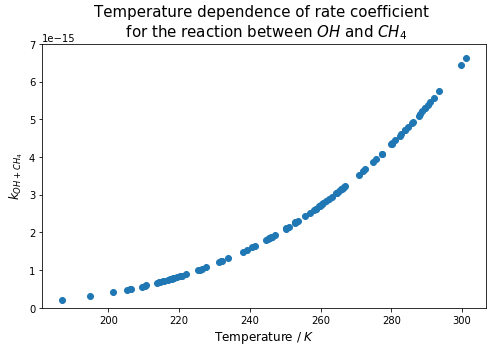

In [13]:
k_OH_CH4 = rate_coeff(A = 1.85e-12, Ea = 14.1, T = data['temp_4d_array']) # rate coefficient in cm3 molecules-1 s-1

# take random sample of rate coefficients and temperature values
import random
rate_T = list(zip(k_OH_CH4.flatten(), data['temp_4d_array'].flatten()))
sample = random.sample(rate_T,100) # generate random sample of tuples of rate coefficient at a given time

# plot random sample, rate coefficient against temperature
fig = plt.figure(figsize = (7, 5))
plt.scatter([s[1] for s in sample], [s[0] for s in sample] )
plt.ylim([0, 7e-15])
plt.xlabel('Temperature / ${K}$', size = 12)
plt.ylabel('${k_{OH + CH_4}}$', size = 12)
plt.title('Temperature dependence of rate coefficient \n for the reaction between ${OH}$ and ${CH_4}$', size = 15)
plt.tight_layout()
plt.show()

#### Interpretation
As expected, the rate constant varied non-linearly with temperature, consistent with Arrhenius dependence.

--------------------------------------------

### Task 7
##### Mathane is typically well-mixed in the troposphere, with an everage mixing ratio of  ${1770}$ ${ppb}$. Using, the total number density provided in the model output, determine the number density of methane, in   ${molecules}$ ${cm^{-3}}$, in each grid-box. 

The function <i> number_density </i> was defined to calculate the number density in each grid-box of a parameter given the average mixing ratio.

In [14]:
def number_density(ppb, num_density_array = data['total_num_density_array']):
    '''
    Returns the number density of a parameter from the average mixing ratio.
    
    ppb [float] = average mixing ratio / ppb
    num_density_array [array] = number density array / molecules m-3
    '''
    density = ppb * num_density_array *1e-09 * 1e-06 # adjust scaling for ppb (1e-9) and m-3 (1e-6)
    return density

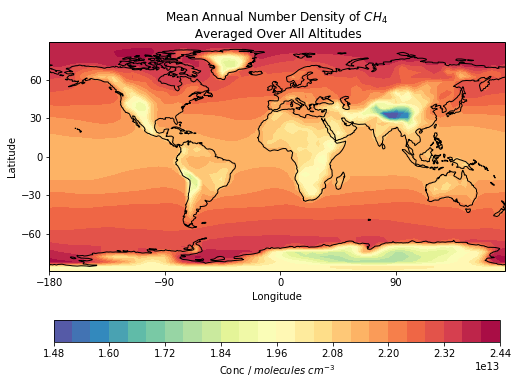

In [15]:
ch4 = number_density(1770) # in molecules cm-3

mean_ch4 = np.mean(ch4, axis = (0, 3)) # mean across months and altitude levels

plot_on_earth(mean_ch4, 'Mean Annual Number Density of ${CH_4}$ \n Averaged Over All Altitudes', 
              cbarlab = 'Conc / ${molecules}$ ${cm^{-3}}$')

#### Interpretation

${CH_4}$ was shown to be well mixed in the atompshere, with a dominant sink in Central Asia. 

--------------------------------------------

### Task 8
##### Calculate the rate of reaction between ${OH}$  and ${CH_4}$, in ${molecules}$ ${cm^{-3}}$ ${s^{-1}}$, in each grid-box. Hence determine when and where is the reaction fastest? Where is the nearest place to this locaton on the globe?

<br>
<div style="text-align: justify">
Three functions were defined <i> multiply_arrays </i>, <i> plot_highlight_on_earth </i> and <i> find_max_rate </i> to complete the task. 
<ul>
<li><i> multiply_arrays </i> allowed for mismatched shapes along the fourth axis, suitable for the different number of model layers in the output arrays from the model. </li>
<li> <i> plot_highlight_on_earth </i> returned a cartopy contour plot of the distribution of mean grid-box values, with particular extent of the plot highlighted in a subplot. </li>
<li><i> find_max_rate </i> allowed maximum values of arrays and the inverse (lifetimes for rates) to be calculated globally. </li></ul></div>

It was attempted to determine the nearest place for the location on the globe using <i> geopy </i> API: 

```python
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="My_Application")
location = geolocator.reverse("%s," %(latitude) + " %s" %(longitude))
print(location.address)
  ```         
  
As the location of the maxima was not confined to a land mass, the API returned "None" and so the location was determined by inspection.      

In [16]:
def multiply_arrays(k, conc1, conc2):
    '''
    Returns the product of three arrays that may have different dimentions in the fourth axis.
    
    k, conc1, conc2 [array] = arrays to multipy. (cf. rate constant(k) and arrays of concentrations (conc1, conc2))
    
    '''
    try:
        product = k * conc1 * conc2 # multipy arrays if all matching in size
        
    except ValueError: # if mismatch array size, match array sizes and multiply
        if conc1.shape > conc2.shape:
            product = k[:, :, :, :conc2.shape[-1]] * conc1[:, :, :, :conc2.shape[-1]] * conc2 
        elif conc2.shape > conc1.shape:
            product = k[:, :, :, :conc1.shape[-1]] * conc2[:, :, :, :conc1.shape[-1]] * conc1 
        elif conc2.shape == conc1.shape:
            product = k[:, :, :, :conc1.shape[-1]] * conc2 * conc1
            
    return product

In [17]:
def plot_highlight_on_earth(array, title, lat, long, cbarlab, show_max = False, 
                    x = 'lon_array', y = 'lat_array', dictionary = data):
    '''
    Variation of plot_on_earth. Returns a contour plot of grid-box values over latitudes and longitudes, 
    with a zoomed inset on desired area. 
    
    array [4d array] = array of gridbox values
    title [string] = desired plot title
    lat, long [list,tuple] = longitude and latitutes of zoomed area
    show_max [bool] = toggle arrow to show maximum on zoomed contour plot
    
    '''
    
    # code as copied from plot_on_earth
    fig= plt.figure(figsize = [10, 6])
    
    x1, x2 = long[0], long[1]
    y1, y2 = lat[0], lat[1]
    
    array = np.transpose(array)
    
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.coastlines()
    ax.set_xticks([-180, -90, 0, 90, 180], crs = ccrs.PlateCarree())
    ax.set_yticks([-60, -30, 0, 30, 60], crs = ccrs.PlateCarree())
    plt.contourf(dictionary['%s' %x], dictionary['%s' %y],array , 25, cmap = plt.cm.get_cmap('Spectral_r'))
    cbar = plt.colorbar(orientation = 'horizontal', shrink = 0.8)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    cbar.set_label('%s' %cbarlab)
    
    # sub_axis defined to highlight longitude and latitue range called to the function
    axins = plt.axes([0.725, 0.55, 0.4, 0.4], projection=ccrs.PlateCarree())
    plt.yticks(visible=False)
    plt.xticks(visible=False)
    axins.set_extent([x1 - 20, x2 + 20, y1 - 20, y2 + 20])  
    axins.set_xlim(x1, x2) # apply the x-limits
    axins.set_ylim(y1, y2) 
    
    # plot grid-box values on same array
    axins.contourf(dictionary['%s' %x], dictionary['%s' %y],array , 25, cmap = plt.cm.get_cmap('Spectral_r'))
    axins.coastlines()
    
    # add border
    from mpl_toolkits.axes_grid1.inset_locator import mark_inset
    mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
    
    # mark maxima on the graph if a maxima location is declared
    if show_max != False:
        axins.annotate('Maximum', xy = (show_max[0], show_max[1]), xytext = (show_max[0] - 6, show_max[1] - 6), 
                       arrowprops = dict(facecolor = 'black', shrink = 0.05))
    
    fig.suptitle('%s' %title)          
    
    return


In [18]:
def find_max_rate(rates, time_in_months = False):
    '''
    Returns maximum of array and location of the maxima in terms of time, latitude, longitude and model level. 
    
    rates [array] = array of grid-box values
    time_in_months [bool] = return time in days or month
    '''
    max_rate = np.nanmax(rates) 
    location = np.where(rates == max_rate) # locate index on maxima
    # extract 'location' of maxima
    mon, long, lat, alt = ((data['time_array'][location[0][0]],
                            data['lon_array'][location[1][0]], data['lat_array'][location[2][0]], location[3][0] ))
    # convert to index of month
    if time_in_months == True:
        mon = np.where(data['time_array'] == mon)[0]

    return [max_rate, (mon, lat, long, alt)]

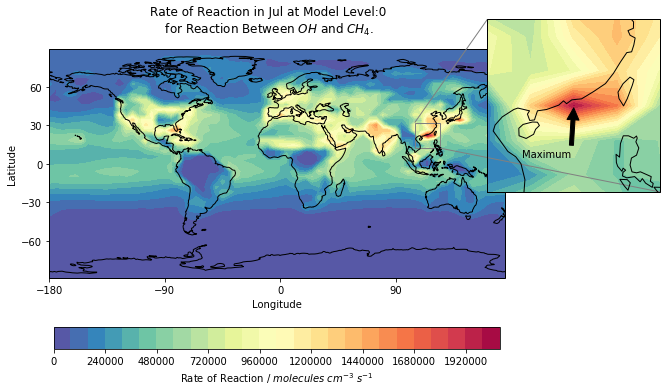

Maximum rate occured in: 
 Month: Jul
 Longitude: 115.0
 Latitude: 22.0
 Model Layer: 0


In [19]:
# Applying functions
oh_ch4_rate = multiply_arrays(k_OH_CH4, data['oh_array'], ch4) # rate in molecules cm-3 s-1
max_rate, meta_data = find_max_rate(oh_ch4_rate, time_in_months = True) # extract max rate and location

rate = np.mean(oh_ch4_rate[meta_data[0], :, :, meta_data[3]], axis = 0) # shape to match longitudes and latitudes

# Contour plot
plot_highlight_on_earth(rate, 
                'Rate of Reaction in ' + months[int(meta_data[0])] + ' at Model Level:' + str(meta_data[3]) + '\n for Reaction Between ${OH}$ and ${CH_4}$.' , 
                show_max = [meta_data[2], meta_data[1]], # declare maxima location (longitude, latitude)  
                lat = [meta_data[1] - 10, meta_data[1] + 10], long = [meta_data[2] -10, meta_data[2] + 10], 
               cbarlab = 'Rate of Reaction / ${molecules}$ ${cm^{-3}}$ ${s^{-1}}$')
plt.show()

print('Maximum rate occured in: \n Month: ' + months[int(meta_data[0])] + '\n Longitude: ' + str(meta_data[2]) + '\n Latitude: ' + str(meta_data[1]) + '\n Model Layer: ' + str(meta_data[3]))

#### Interpretation

Maximum rate was located just off the coast of Hong Kong. This is consistent with the large industrial activity in the area. 

--------------------------------------------

### Task 9
##### Since the reaction between ${OH}$  and ${CH_4}$ is the dominant sink for methane in the atmosphere, the methane lifetime ${\tau}$ can be determined from the following:


$$ {\tau} = {\frac{1}{k_{OH+CH_4}[OH]}} $$

##### where ${k_{OH+CH_4}}$ is the rate coefficient for the reaction between ${OH}$  and ${CH_4}$ and $[OH]$ is the ${OH}$ radical concentration. 

##### Calculate the annual mean global ${k_{OH+CH_4}[OH]}$ and hence the annual mean global methane lifetime. Report your answer for methane lifetime in years. 

<br>
<div style="text-align: justify">
    The function <i> get_agmean_and_lifetime </i> was defined to calculate the annual global mean and lifetime of a given array. The function contained an inner function <i> secs_to_years </i> to convert the lifetime into years using a conversion factor. The advantage of this function would be in its application to calculate the lifetime of other parameters if needed. </div>


In [20]:
def get_agmean_and_lifetime(array):
    '''
    Returns the annual global mean and lifetime (inverse of mean) of an array 
    
    array [array] = grid-box value
    
    '''

    def secs_to_years(seconds):
        '''
        Converts a value from seconds to years. 
        
        seconds [float] = number to convert
        '''
        years = 3.171e-08 * seconds
        return years

    mean = np.mean(array) # global mean
    tau = 1/mean
    tau_years = secs_to_years(tau)
    tau_rounded = '{:.2f}'.format(tau_years) # to 2 dp
    mean_rounded = '{:.2e}'.format(mean) # to 2 dp in scientific notation
    
    return (mean_rounded, tau_rounded)

In [21]:
k_OH = multiply_arrays(k_OH_CH4, data['oh_array'], np.ones(k_OH_CH4.shape)) 
# function takes 3 arrays, define array of 1s, k_OH in s-1

mean_global_k_OH, mean_global_CH4_lifetime = get_agmean_and_lifetime(k_OH)

print('Annual mean global k[OH] is ' + mean_global_k_OH +' s-1 and annual mean global methane lifetime is ' + 
      mean_global_CH4_lifetime + ' years.')

Annual mean global k[OH] is 3.27e-09 s-1 and annual mean global methane lifetime is 9.69 years.


#### Interpretation

${CH_4}$ is long-lived in the atmosphere with a lifetime over 9 years. 

--------------------------------------------

### Task 10
##### Assuming no other changes to the model how would the annual mean methane lifetime change if the temperature in each grid-box were to increase by  ${1.5}$ ${K}$?

In [22]:
# Recalculate rate coefficient with an increase in temperature 
new_k_OH_CH4 = rate_coeff(A = 1.85e-12, Ea = 14.1, T = data['temp_4d_array'] + 1.5) # cm3 molecules-1 s-1

# Recalculate k[OH] using new rate coefficient
new_k_OH = multiply_arrays(new_k_OH_CH4, data['oh_array'], np.ones(k_OH_CH4.shape)) # s-1

mean_global_k_OH, mean_global_CH4_lifetime = get_agmean_and_lifetime(new_k_OH) 

print('Annual mean global k[OH] is ' + mean_global_k_OH +' s-1 and annual mean global methane lifetime is ' + 
      mean_global_CH4_lifetime + ' years.')

Annual mean global k[OH] is 3.38e-09 s-1 and annual mean global methane lifetime is 9.37 years.


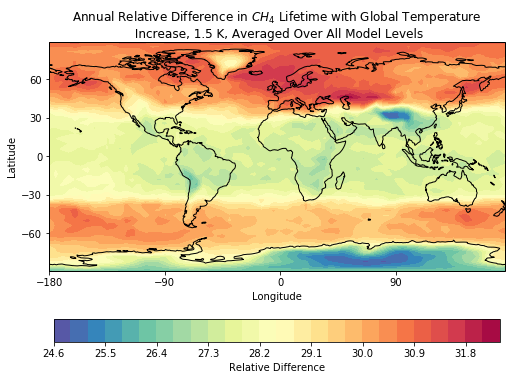

In [25]:
# allow mask 0 values in array, avoid DivideByZero error
new_k_OH[new_k_OH == 0] = np.nan

# % difference in old and new k[OH]
diff_in_k_OH = ((new_k_OH - k_OH))/ k_OH

# redefine nan values as 0
diff_in_k_OH[np.isnan(diff_in_k_OH)] = 0 

mean_rate = np.mean(diff_in_k_OH, axis = (0, 3)) # mean over months and altitutes
mean_lifetimes = 1/mean_rate # take inverse to compute lifetimes

plot_on_earth(mean_lifetimes, 'Annual Relative Difference in $CH_4$ Lifetime with Global Temperature \n Increase, 1.5 K, Averaged Over All Model Levels',
              cbarlab = 'Relative Difference')

#### Interpretation

<br>
<div style="text-align: justify">
A small increase in temperature, increased the rate of methane removal. The effect of just 1.5 K was fairly signficiant since the lifetime of ${CH_4}$ decreased by around 3 months. The impact of adjusting temperature by 1.5 K was felt more signficantly away from the equator. Global temperatures are usually cooler in these regions, hence the magnitude of the change in temperature and hence change in rate coefficient, was greater. As a result, the relative difference in lifetime of methane was greater in these regions as the rate of removal increased. </div>

--------------------------------------------

### Task 12
##### Measurements of ${OH}$ radicals, including those made by the Heard group, indicate that models significantly underestimate the ${OH}$ concentrations in forested regions in the tropics. How would the calculated annual mean methane life time change if the modelled ${OH}$ concentration in such regions (see table) were increased by a factor of 10? Include appropiate global annual mean value(s) amd a suitable surface layer contour map to illustrate your answer. 

<table>
<div style="text-align:center">
<tr>    
    <th bgcolor = "#F5F5F5" colspan = '3' style="text-align:center">Latitudes</th>
    </tr>
<tr>
    <td bgcolor = "#FFFFFF" colspan = '3' style="text-align:center">-20 to +10</td>
    </tr>
<tr class= "blank_row"><td bgcolor = "#FFFFFF" colspan = "3"></td></tr>
<tr>    
    <th bgcolor = "#F5F5F5" colspan = '3' style="text-align:center">Longitudes</th>
    </tr>
<tr>
    <td bgcolor = "#FFFFFF">-80 to -50</td>
    <td bgcolor = "#FFFFFF">+10 to +30</td>
    <td bgcolor = "#FFFFFF">+100 to +170</td>
    </tr>
<tr class= "blank_row"><td bgcolor = "#FFFFFF" colspan="2" style="text-align:center"></td></tr>
<tr>    
    <th bgcolor = "#F5F5F5" colspan = '3' style="text-align:center">Model Layers</th>
    </tr>
<tr>
    <td bgcolor = "#FFFFFF" colspan = '3' style="text-align:center">0 to 7</td>
    </tr>
    </div>
</table>

<br>
<div style="text-align: justify">
Given the bespoke nature of the longitute and latitude ranges, it was decided that a new user defined function would be impractical and unneccessary. Boolean filtering was used to adjust gridbox values in the forested regions in the tropics only by a factor of 10. <i> plot_highlight_on_earth </i> function was then used to visualise the global distributions of $OH$ before and after the adjustment. The <i> plot_on_earth </i> function was used to visualise the relative difference in $CH_4$ lifetime, ${\tau}$, following the adjustment in the tropics. </div>

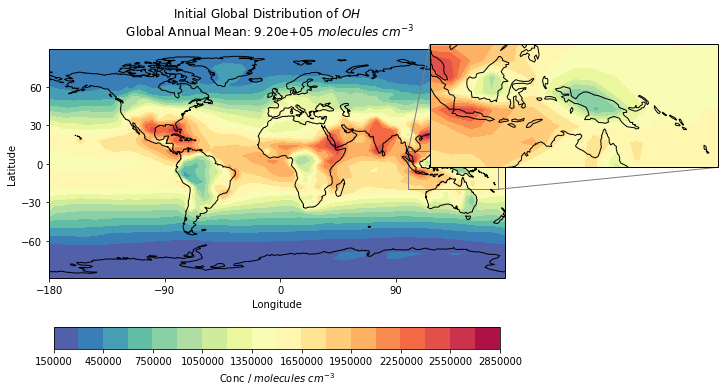

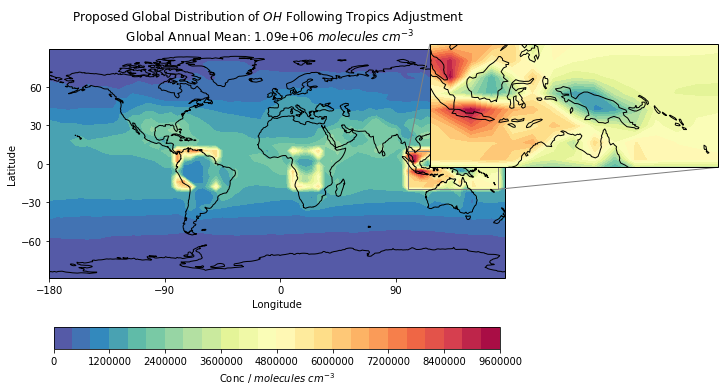

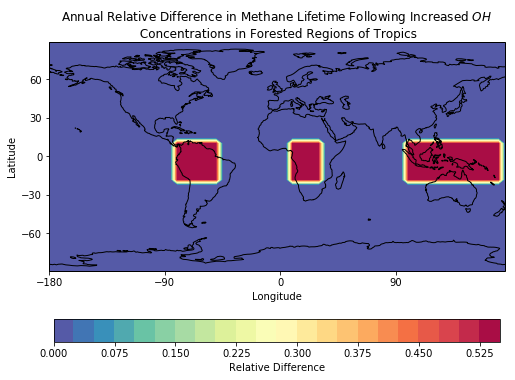

Annual mean global k[OH] is 4.27e-09 s-1 and annual mean global methane lifetime is 7.43 years.


In [26]:
# Define Boolean filters for each axis
lat_filter = np.logical_and(data['lat_array'] >= -20, data['lat_array'] <= 10)  # latitudes between -20 and 10
lon_filter = np.logical_or(np.logical_or(np.logical_and(data['lon_array'] >= -80, data['lon_array'] <= -50),
                           np.logical_and(data['lon_array'] >= 10, data['lon_array'] <= 30)),
                            np.logical_and(data['lon_array'] >= 100, data['lon_array'] <= 170)) 
                            # long between -80 to -50 or 10 to 30 or 100 to 170
month_filter = np.array([True for i in range(len(data['time_array']))]) # all months
level_filter = np.array([True for i in range(8)]) # levels 0 to and including 7

# Define multi-dimensional filter using 1D arrays
grid_boxes = np.ix_(month_filter,lon_filter, lat_filter, level_filter)

# Plot initial data on contour plot and calculate means
global_mean = np.mean(data['oh_array'])
rounded_global_mean = '{:.2e}'.format(global_mean)
plot_highlight_on_earth(np.mean(data['oh_array'], axis = (0,3)),
                        'Initial Global Distribution of $OH$ \n Global Annual Mean: ' + rounded_global_mean +' ${molecules}$ ${cm^{-3}}$', 
                        lat = [-20, 10], long = [100, 170], 
                       cbarlab ='Conc / ${molecules}$ ${cm^{-3}}$' ) # highlight one region of tropics

# Apply adjustment to grid box values in forested regions only
data['oh_array'][grid_boxes] = data['oh_array'][grid_boxes] * 10

# Recalculate k[OH] and global mean values
adjusted_k_OH = multiply_arrays(k_OH_CH4, data['oh_array'], np.ones(k_OH_CH4.shape))
adjusted_global_mean = np.mean(data['oh_array'])
adj_rounded_global_mean = '{:.2e}'.format(adjusted_global_mean)

# Plot recalculated data following adjustment
plot_highlight_on_earth(np.mean(data['oh_array'], axis = (0,3)),
                        'Proposed Global Distribution of $OH$ Following Tropics Adjustment \n Global Annual Mean: ' + adj_rounded_global_mean +' ${molecules}$ ${cm^{-3}}$', 
                        lat = [-20, 10], long = [100, 170],
                        cbarlab ='Conc / ${molecules}$ ${cm^{-3}}$')

# Get new max rate and lifetime for methane
adjusted_agmean, adjusted_mean_lifetime = get_agmean_and_lifetime(adjusted_k_OH)

# Calculate the difference in lifetime following adjustment
k_OH[k_OH == 0] = np.nan # mask 0 to avoid DivideByZero error
difference = ((adjusted_k_OH - k_OH))/ k_OH
difference[np.isnan(difference)] = 0 
mean_k_OH = np.mean(difference, axis = (0, 3)) # mean k[OH] over model layer and months
mean_k_OH[mean_k_OH == 0] = np.nan # mask 0 values before division
mean_tau = 1/mean_k_OH 
mean_tau[np.isnan(mean_tau)] = 0 # if k[OH] remains unchanged, so will lifetime

plot_on_earth(mean_tau, 'Annual Relative Difference in Methane Lifetime Following Increased $OH$ \n Concentrations in Forested Regions of Tropics', 
              cbarlab = 'Relative Difference')

print('Annual mean global k[OH] is ' + adjusted_agmean +' s-1 and annual mean global methane lifetime is ' + 
      adjusted_mean_lifetime + ' years.')

#### Interpretation

Increasing the concentration of ${OH}$ by a factor of 10 in only forested regions in the Tropics, significantly increased global annual mean ${OH}$ concentration and signficiantly decreased methane lifetime, by 2 years. The increased distribution of $OH$ in these areas resulted in a signficant increase in rate of ${CH_4}$ removal. This implied that the rate coefficient ${k_{OH+CH_4}}$ was higher in these areas, thus leading to a signficiant reduction in methane lifetime when ${OH}$ concentration increased in this area.

--------------------------------------------